In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pyarma as arma

path = 'prob7_u_cube_noV'
u_cube = arma.cx_cube()
u_cube.load(path)


True

In [35]:
# Set up a 2D xy grid
h = 0.005
x_points = np.arange(0, 1, h)
y_points = np.arange(0, 1, h)
x, y = np.meshgrid(x_points, y_points, sparse=True)

# Array of time points
T = 0.002
dt = 2.5e-5
t_points = np.arange(0, T, dt)

In [36]:
def z(cx_cube, t):

    # Get the value at the specified indices
    u_slice = cx_cube[arma.single_slice, t]
    
    u_mat = arma.cx_mat(u_slice)
    
    
    # Return the value as a complex number
    return arma.real(u_slice @ arma.conj(u_slice))

In [37]:
# Fill z_data_list with f(x,y,t)
z_data_list = []
for t in range(u_cube.n_slices):
    z_data = z(u_cube, t)
    z_data_list.append(z_data)

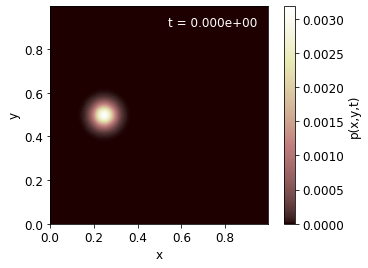

In [38]:


#
# Now the list z_data_list contains a series of "frames" of z(x,y,t), 
# where each frame can be plotted as a 2D image using imshow. Let's
# animate it!
#

# Some settings
fontsize = 12
t_min = t_points[0]
x_min, x_max = x_points[0], x_points[-1]
y_min, y_max = y_points[0], y_points[-1]

# Create figure
fig = plt.figure()
ax = plt.gca()

# Create a colour scale normalization according to the max z value in the first frame
norm = matplotlib.cm.colors.Normalize(vmin=0.0, vmax=z_data_list[0].max())

# Plot the first frame
img = ax.imshow(z_data_list[0], extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("pink"), norm=norm)

# Axis labels
plt.xlabel("x", fontsize=fontsize)
plt.ylabel("y", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Add a colourbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label("p(x,y,t)", fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

# Add a text element showing the time
time_txt = plt.text(0.95, 0.95, "t = {:.3e}".format(t_min), color="white", 
                    horizontalalignment="right", verticalalignment="top", fontsize=fontsize)

# Function that takes care of updating the z data and other things for each frame
def animation(i):
    # Normalize the colour scale to the current frame?
    norm = matplotlib.cm.colors.Normalize(vmin=0.0, vmax=z_data_list[i].max())
    img.set_norm(norm)

    # Update z data
    img.set_data(z_data_list[i])

    # Update the time label
    current_time = t_min + i * dt
    time_txt.set_text("t = {:.3e}".format(current_time))

    return img

# Use matplotlib.animation.FuncAnimation to put it all together
anim = FuncAnimation(fig, animation, interval=1, frames=np.arange(0, len(z_data_list), 2), repeat=False, blit=0)

# Run the animation!
plt.show()

# # Save the animation
anim.save('./animation_noV.mp4', writer="ffmpeg", bitrate=1000, fps=24, dpi=200)